In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
f=[]
f.append(pd.read_csv('wolff_16.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_32.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_48.txt', sep=' ', header=0))
f.append(pd.read_csv('wolff_64.txt', sep=' ', header=0))

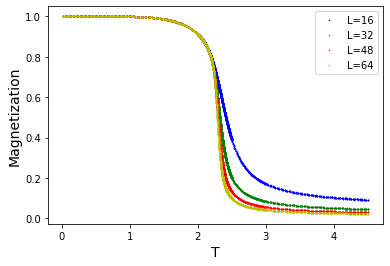

In [6]:
plt.plot(f[0].temperature, f[0].m, 'b.', markersize=1, label='L=16')
plt.plot(f[1].temperature, f[1].m, 'g.', markersize=1, label='L=32')
plt.plot(f[2].temperature, f[2].m, 'r.', markersize=1, label='L=48')
plt.plot(f[3].temperature, f[3].m, 'y.', markersize=1, label='L=64')
plt.xlabel('T', fontsize=14)
plt.ylabel('Magnetization', fontsize=14)
plt.legend()
plt.show()

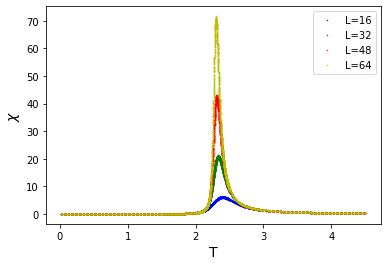

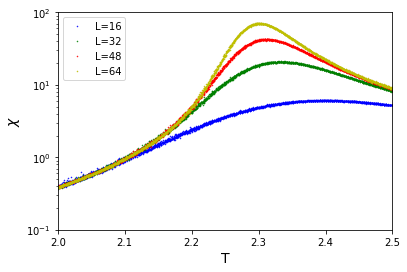

In [7]:
plt.plot(f[0].temperature, f[0].mag_sus, 'b.', markersize=1, label='L=16')
plt.plot(f[1].temperature, f[1].mag_sus, 'g.', markersize=1, label='L=32')
plt.plot(f[2].temperature, f[2].mag_sus, 'r.', markersize=1, label='L=48')
plt.plot(f[3].temperature, f[3].mag_sus, 'y.', markersize=1, label='L=64')
plt.xlabel('T', fontsize=14)
plt.ylabel('$\chi$', fontsize=14)
plt.legend()
plt.show()
plt.plot(f[0].temperature, f[0].mag_sus, 'b.', markersize=1, label='L=16')
plt.plot(f[1].temperature, f[1].mag_sus, 'g.', markersize=1, label='L=32')
plt.plot(f[2].temperature, f[2].mag_sus, 'r.', markersize=1, label='L=48')
plt.plot(f[3].temperature, f[3].mag_sus, 'y.', markersize=1, label='L=64')
plt.xlim(2,2.5)
plt.ylim(0.1, 100)
plt.xlabel('T', fontsize=14)
plt.ylabel('$\chi$', fontsize=14)
plt.yscale('log')
plt.legend()
plt.show()

maximum location = 1.8445874314791215


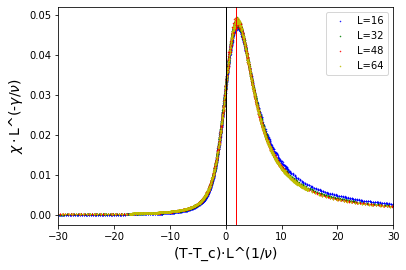

In [9]:
T_c=2/np.log(1+np.sqrt(2)) #critical temperature
nu = 1
gamma = 7/4
plt.plot((f[0].temperature-T_c)*16**(1/nu), f[0].mag_sus*16**(-gamma/nu), 'b.', markersize=1, label='L=16')
plt.plot((f[1].temperature-T_c)*32**(1/nu), f[1].mag_sus*32**(-gamma/nu), 'g.', markersize=1, label='L=32')
plt.plot((f[2].temperature-T_c)*48**(1/nu), f[2].mag_sus*48**(-gamma/nu), 'r.', markersize=1, label='L=48')
plt.plot((f[3].temperature-T_c)*64**(1/nu), f[3].mag_sus*64**(-gamma/nu), 'y.', markersize=1, label='L=64')
a = 0
for i in range (4):
    a = a + ((f[i].temperature-T_c)*(16*(1+i))**(1/nu))[np.argmax(f[i].mag_sus*16**(-gamma/nu))]
a /=4
print("maximum location =", a)
plt.xlim(-30, 30)
plt.xlabel('(T-T_c)$\cdot$L^(1/$ \\nu$)', fontsize=14)
plt.ylabel('$\chi\cdot$L^(-$\gamma$/$\\nu$)', fontsize=14)
plt.axvline(x=0, color='k', linewidth=1)
plt.axvline(x=a, color='r', linewidth=1)
plt.legend()
plt.show()

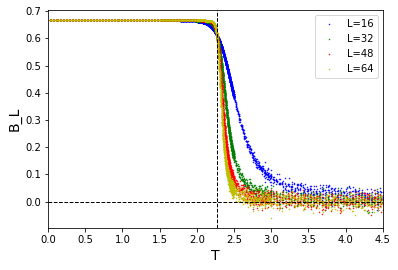

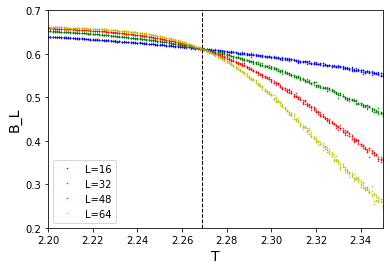

In [12]:
plt.plot(f[0].temperature, 1-f[0].m4/(3*f[0].m2**2), 'b.', markersize=1, label='L=16')
plt.plot(f[1].temperature, 1-f[1].m4/(3*f[1].m2**2), 'g.', markersize=1, label='L=32')
plt.plot(f[2].temperature, 1-f[2].m4/(3*f[2].m2**2), 'r.', markersize=1, label='L=48')
plt.plot(f[3].temperature, 1-f[3].m4/(3*f[3].m2**2), 'y.', markersize=1, label='L=64')
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlim(0, 4.5)
plt.xlabel('T', fontsize=14)
plt.ylabel('B_L', fontsize=14)
plt.legend()
plt.show()
plt.plot(f[0].temperature, 1-f[0].m4/(3*f[0].m2**2), 'b.', markersize=1, label='L=16')
plt.plot(f[1].temperature, 1-f[1].m4/(3*f[1].m2**2), 'g.', markersize=1, label='L=32')
plt.plot(f[2].temperature, 1-f[2].m4/(3*f[2].m2**2), 'r.', markersize=1, label='L=48')
plt.plot(f[3].temperature, 1-f[3].m4/(3*f[3].m2**2), 'y.', markersize=1, label='L=64')
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.xlim(2.2, 2.35)
plt.ylim(0.2, 0.7)
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlabel('T', fontsize=14)
plt.ylabel('B_L', fontsize=14)
plt.legend()
plt.show()

In [52]:
points = 5
maxpoint=np.zeros((4, points))
pseudopoint=np.zeros(4)
maxerr=np.zeros(4)
for j in range (4):
    for i in range (points):
        maxpoint[j][i]=f[j].temperature[f[j].mag_sus==sorted(f[j].mag_sus, reverse=True)[i]]
    pseudopoint[j]=np.average(maxpoint[j])
    maxerr[j]=np.std(maxpoint[j])

y = 2.0791138461538354 x + 2.2670205128205128


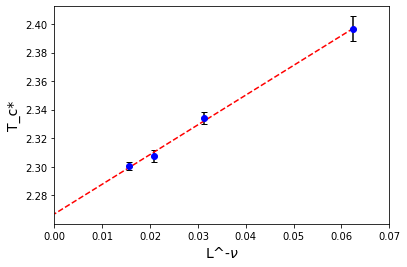

In [98]:
t = [1/(16*(1+v)) for v in range (4)]
t.append(0)
z = np.polyfit(t[:4], pseudopoint, 1)
p = np.poly1d(z)
print("y =", z[0], "x +", z[1])
plt.errorbar(t[:4], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p(t),"r--")
plt.xlabel('L^-$\\nu$', fontsize=14)
plt.ylabel('T_c*', fontsize=14)
plt.xlim(0, 0.07)
plt.show()

In [84]:
T_c_max = np.zeros((2**4, 4))
zz=[]
T_c_range = np.zeros(2**4)
for i in range (2**4):
    for j in range (4):
        det = int(i/(2**j))%2
        T_c_max[i][j]=pseudopoint[j]+maxerr[j]*((-1)**det)
    zz.append(np.polyfit(t[:4], T_c_max[i], 1))
    T_c_range[i] = zz[i][1]

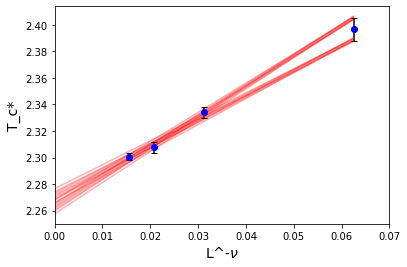

In [99]:
for i in range (2**4):
    plt.plot(t, np.poly1d(zz[i])(t), 'r-', alpha=0.3)
plt.errorbar(t[:4], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.xlabel('L^-$\\nu$', fontsize=14)
plt.ylabel('T_c*', fontsize=14)
plt.xlim(0, 0.07)
plt.show()

average = 2.2670205128205128
err = 0.005308219966339498


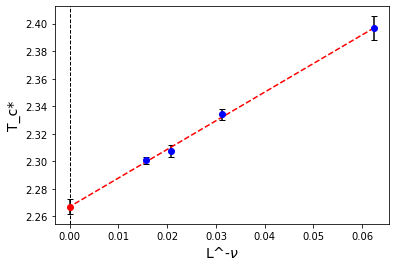

In [104]:
print("average =", np.average(T_c_range))
print("err =", np.std(T_c_range))
plt.errorbar(t[:4], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.errorbar(0, np.average(T_c_range), yerr=np.std(T_c_range), fmt="ro", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p(t),"r--")
plt.xlabel('L^-$\\nu$', fontsize=14)
plt.ylabel('T_c*', fontsize=14)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.show()